In [ ]:
import pandas as pd

# Replace 'path_to_dataset' with the actual path to your dataset file
df = pd.read_csv('/content/Australian Vehicle Prices.csv')
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [ ]:
df.shape

(16734, 19)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
missing_values = df.isna().sum()
total_rows = df.shape[0]

print("Missing Value Count for Each Column:")
print(missing_values)
print("\nTotal Number of Rows:", total_rows)


Missing Value Count for Each Column:
Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

Total Number of Rows: 14586


In [ ]:
df.dropna(inplace=True)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df.fillna('No_data', inplace=True)


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
missing_values = df.isna().sum()
total_rows = df.shape[0]

print("Missing Value Count for Each Column:")
print(missing_values)
print("\nTotal Number of Rows:", total_rows)


Missing Value Count for Each Column:
Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

Total Number of Rows: 14586


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Count the occurrences of each brand
brand_counts = df['Brand'].value_counts()

# Filter the DataFrame based on the condition
df = df[df['Brand'].isin(brand_counts[brand_counts > 150].index)]


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Get the total number of unique brands
total_unique_brands = df['Brand'].nunique()

# Display the total number of unique brands
print("Total unique brands:", total_unique_brands)
import pandas as pd

# Assuming df is your DataFrame

# Get the count of each unique brand
brand_counts = df['Brand'].value_counts()

# Display the total count of each unique brand
print(brand_counts)


Total unique brands: 22
Brand
Toyota           2261
Hyundai          1150
Mazda            1073
Holden           1024
Ford              968
Mitsubishi        960
Nissan            837
Volkswagen        785
Kia               765
Mercedes-Benz     531
Subaru            520
Audi              432
BMW               402
Honda             321
Jeep              286
MG                278
Suzuki            266
Land              197
Isuzu             175
GWM               174
Renault           161
Lexus             153
Name: count, dtype: int64


In [ ]:
df.shape

(13719, 19)

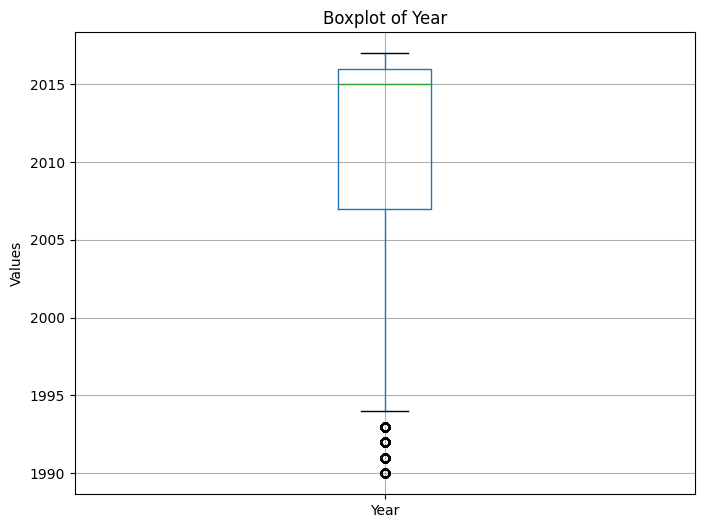

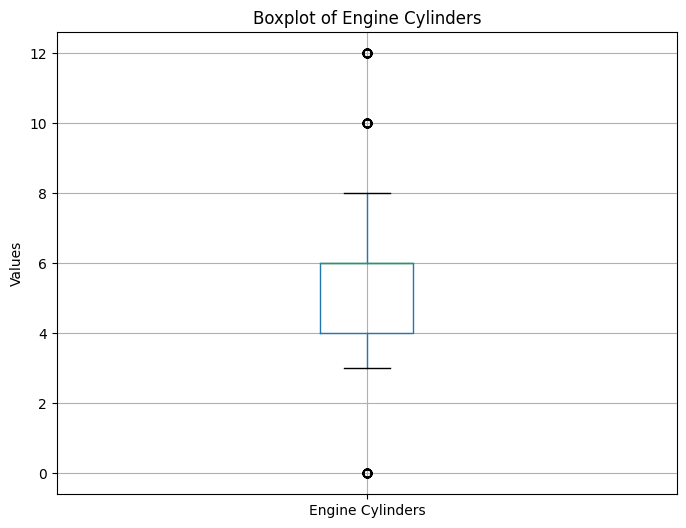

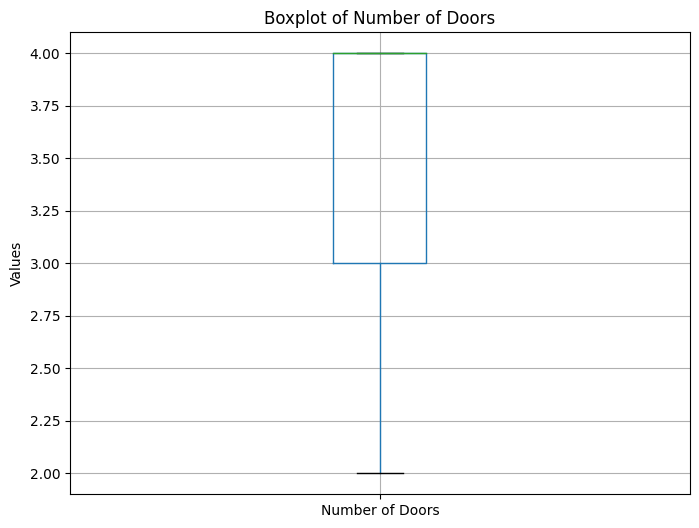

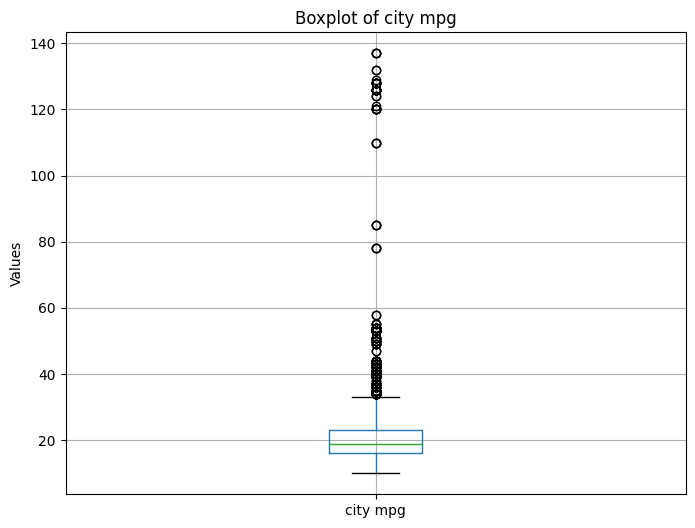

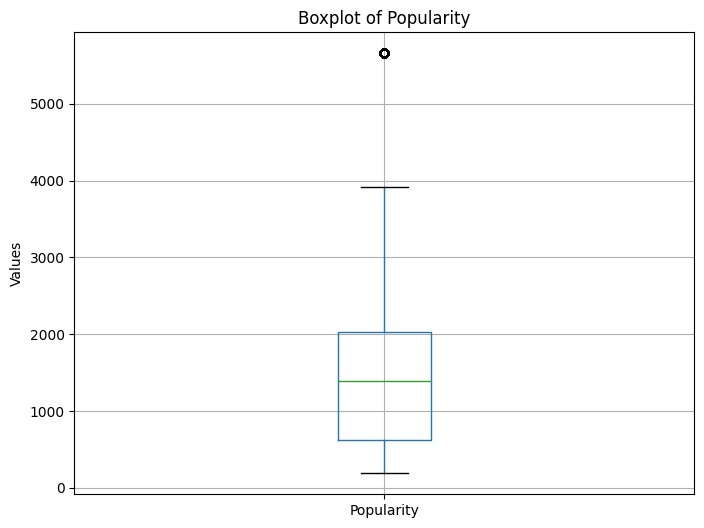

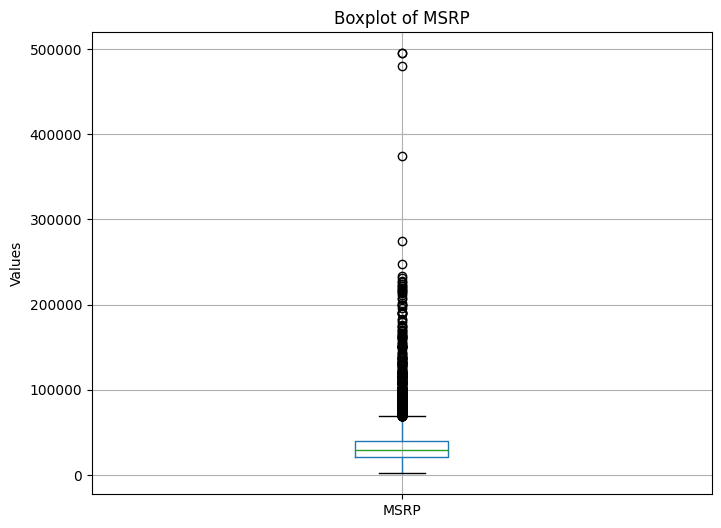

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# If your data is in a CSV file, you can read it like this:
# df = pd.read_csv('your_data.csv')

# Create a boxplot for each numerical column
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.show()

In [ ]:
import pandas as pd

# Calculate quartiles
Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)

# Categorize based on quartiles
df['MSRP'] = pd.cut(df['MSRP'], bins=[float('-inf'), Q1, Q3, float('inf')], labels=[1, 2, 3])

# Now df['price_category'] will have categorical values: 1 below Q1, 2 between Q1 and Q3, and 3 above Q3


In [ ]:
df.shape

(13719, 19)

In [ ]:
X = df.drop(columns=['Brand'])
y = df['Brand']

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int', 'float']).columns

# Create DataFrames for categorical and numerical columns
X_categorical = X[categorical_columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder



# Perform label encoding only on columns with dtype object
label_encoder = LabelEncoder()
X_encoded = X_categorical.copy()
for col in categorical_columns:
    X_encoded[col] = X[col].astype(str)  # Ensure the column is of string dtype before label encoding
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

# Merge with original X containing int and float columns
X_final = pd.concat([X_encoded, X.select_dtypes(include=['int', 'float'])], axis=1)

# Print the first few rows to verify
X_final.head()


,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Year
1,315,74,5917,2,1,13,2,6,104,3151,23,73,5,3,3,7,606,2022.0
2,41,52,5757,2,1,18,3,6,103,11156,315,498,5,2,0,6,36,2022.0
3,169,52,1325,2,1,66,3,6,13,2026,557,351,8,2,0,6,1361,2011.0
4,79,166,6022,2,1,11,2,7,97,216,231,111,5,6,2,7,1478,2022.0
6,399,166,3578,2,1,18,1,1,88,9928,518,57,5,6,0,6,2472,2017.0


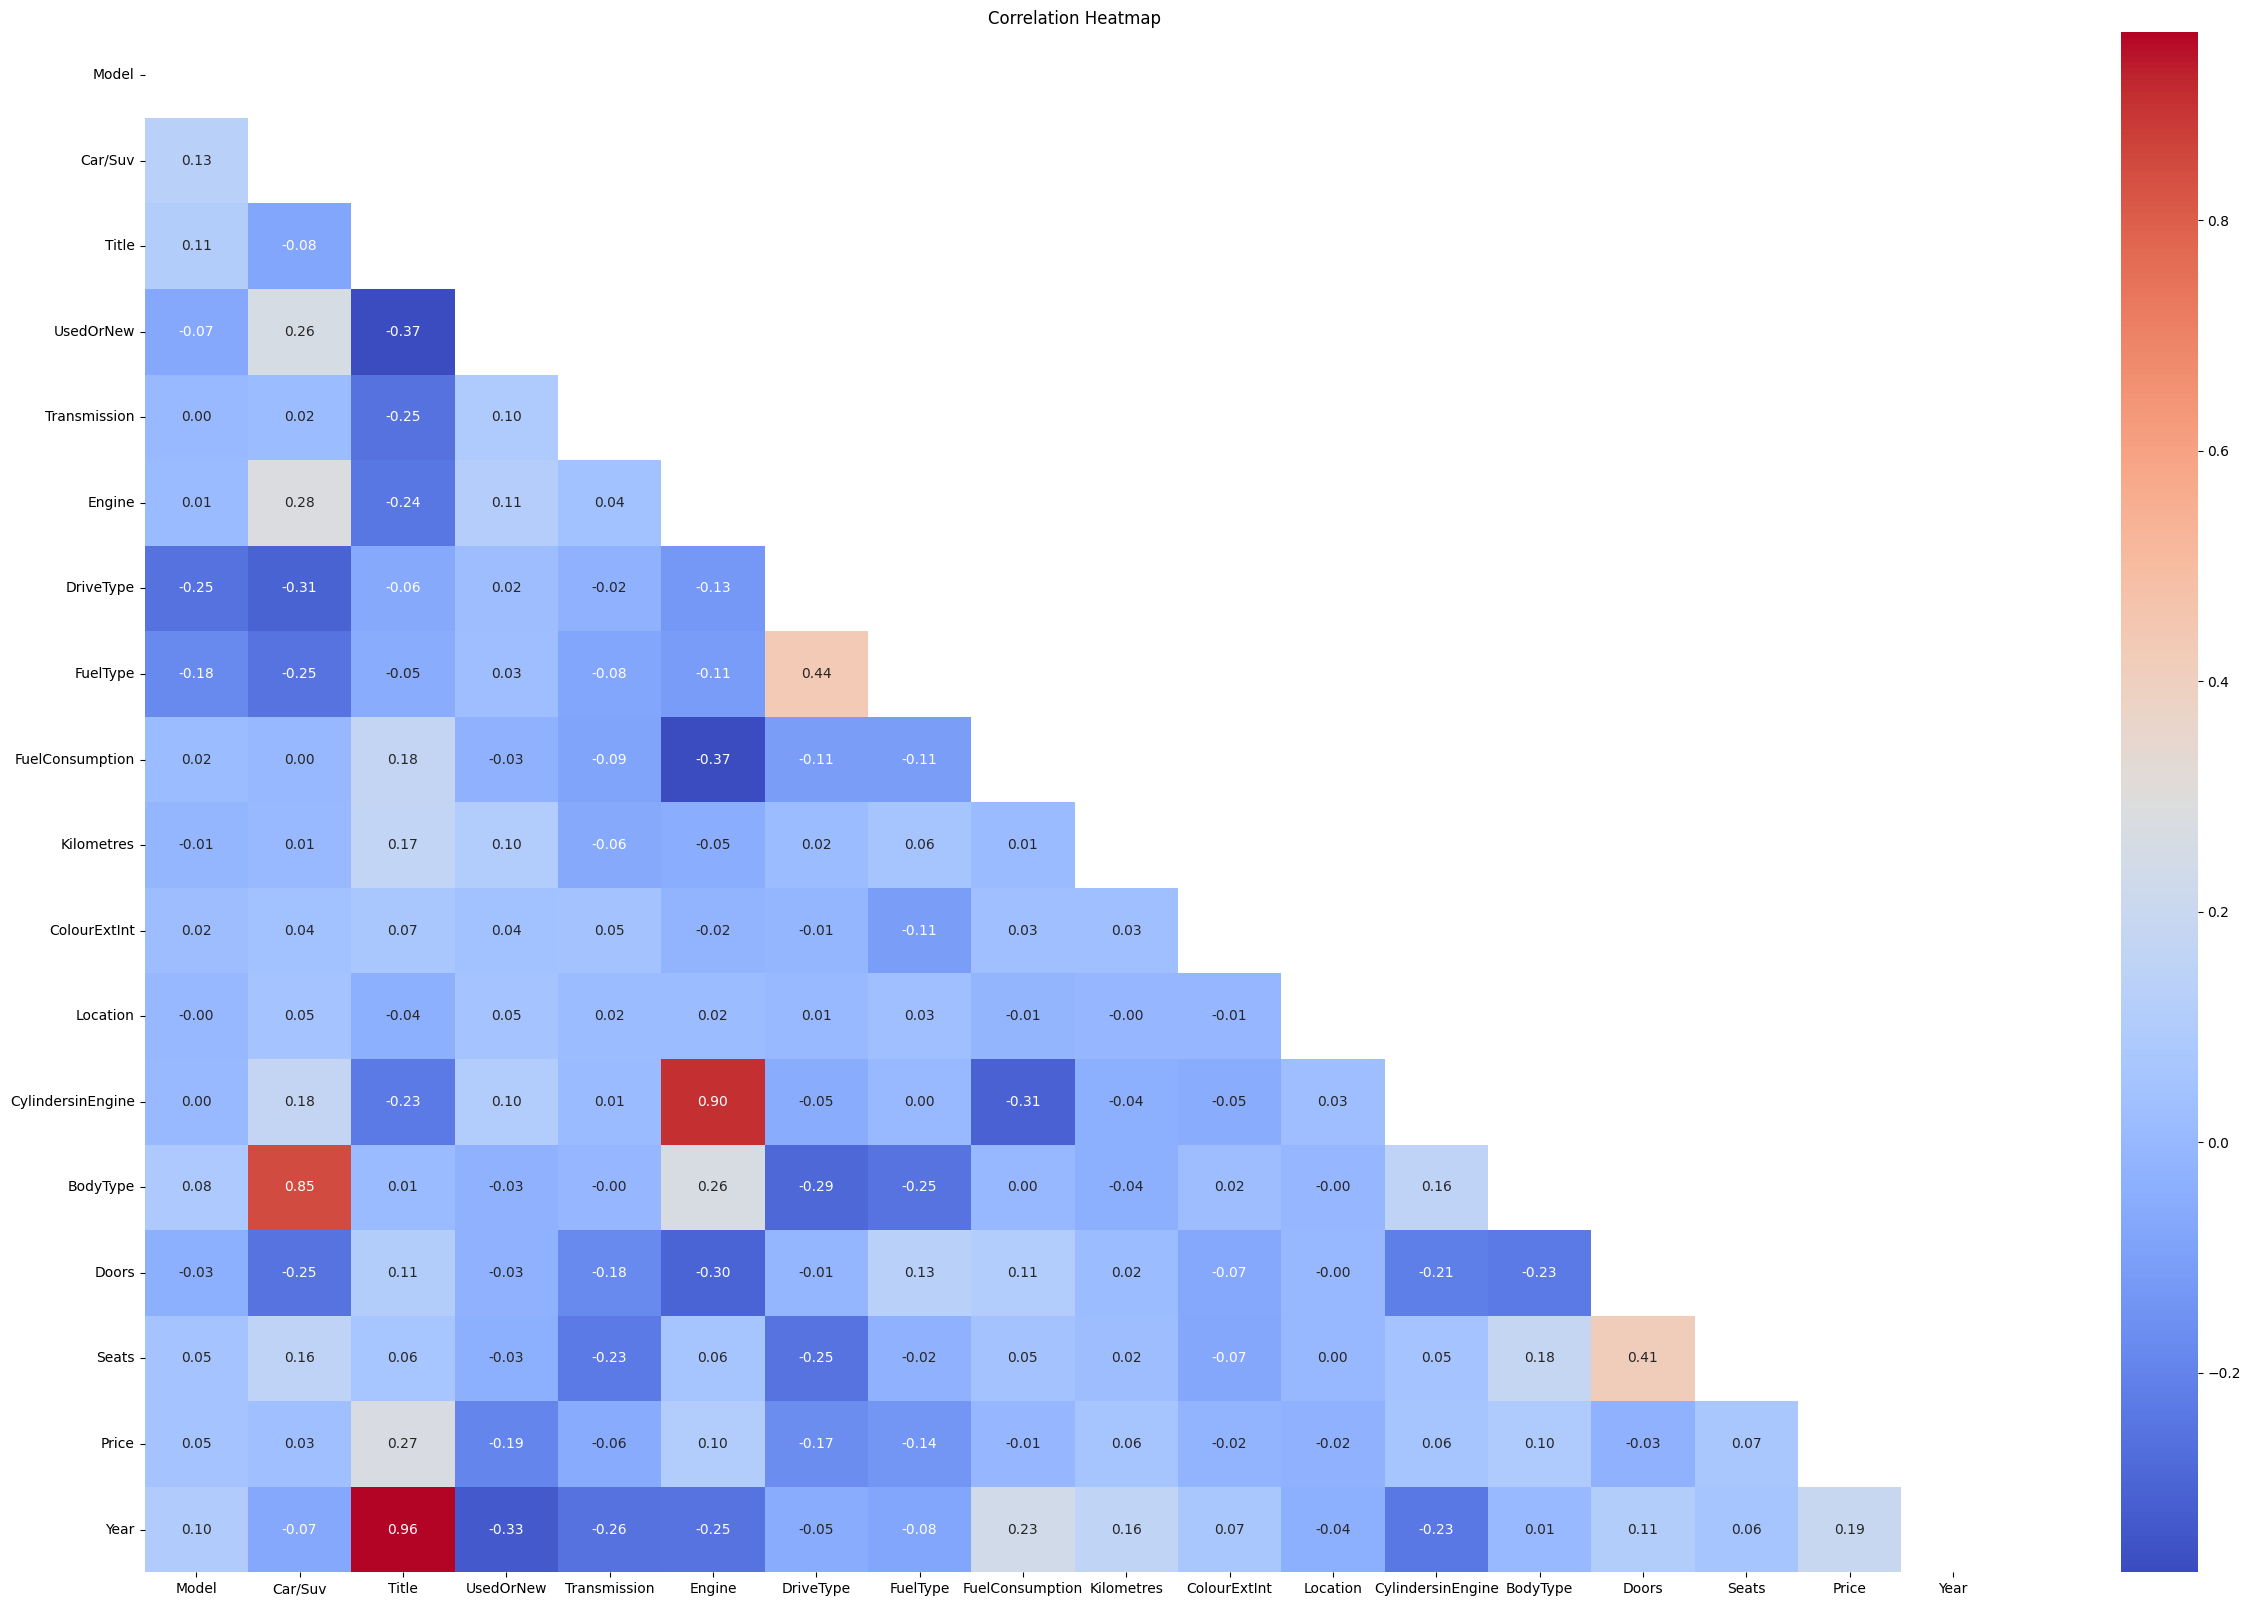

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
corr_matrix = X_final.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Plot the correlation heatmap using seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# Delete the 'vin' and 'lot' columns
df = df.drop(columns=['Car/Suv', 'Title','Engine'])

# Print the first few rows of the DataFrame to verify
df.head()


,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
1,MG,2022.0,MG3,USED,Automatic,Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,USED,Automatic,Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,USED,Automatic,Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,USED,Automatic,Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
6,Land,2017.0,Rover,USED,Automatic,AWD,Diesel,5.1 L / 100 km,67662,White / Black,"Blacktown, NSW",4 cyl,SUV,2 Doors,4 Seats,62280


In [ ]:
df.shape

(13719, 16)

In [ ]:
df.to_xlsx('Dataset33new.xlsx', index=False)

AttributeError: 'DataFrame' object has no attribute 'to_xlsx'

In [ ]:
X_final.shape

(9889, 13)

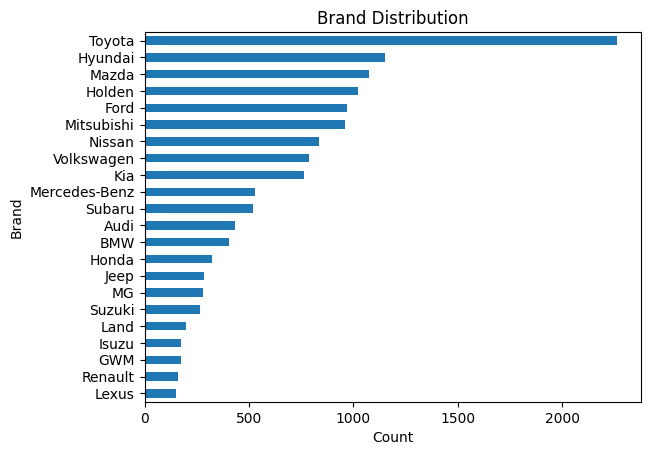

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
brand_counts = df['Brand'].value_counts()
brand_counts = brand_counts.sort_values(ascending=True)
brand_counts.plot(kind='barh')
plt.title('Brand Distribution')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

In [ ]:
import pandas as pd

# Replace 'path_to_dataset' with the actual path to your dataset file
df = pd.read_csv('/content/Dataset33new (1).csv')
df.head()

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,MG,2022,MG3,USED,Automatic,Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
1,BMW,2022,430I,USED,Automatic,Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
2,Mercedes-Benz,2011,E500,USED,Automatic,Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
3,Renault,2022,Arkana,USED,Automatic,Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
4,Land,2017,Rover,USED,Automatic,AWD,Diesel,5.1 L / 100 km,67662,White / Black,"Blacktown, NSW",4 cyl,SUV,2 Doors,4 Seats,62280


In [ ]:
X = df.drop(columns = 'Brand')
y = df['Brand']

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int', 'float']).columns

# Create DataFrames for categorical and numerical columns
X_categorical = X[categorical_columns]
X_numerical = X[numerical_columns]

from sklearn.preprocessing import LabelEncoder



# Perform label encoding only on columns with dtype object
label_encoder = LabelEncoder()
X_encoded = X_categorical.copy()
for col in categorical_columns:
    X_encoded[col] = X[col].astype(str)  # Ensure the column is of string dtype before label encoding
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


# Initialize LabelEncoder for the target variable y
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)
# Merge with original X containing int and float columns
X_final = pd.concat([X_encoded, X.select_dtypes(include=['int', 'float'])], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


# Initialize LabelEncoder for the target variable y
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you already have X and y defined
# Split the data into training and testing sets


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state = 42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report

# Assuming you have already trained your RandomForestClassifier and made predictions
# Predict the labels of the test set
y_pred = rf_classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, digits=3)

# Print the classification report
print("Classification Report:\n", report)



Accuracy: 0.9814139941690962
Classification Report:
               precision    recall  f1-score   support

           0      0.949     1.000     0.974        75
           1      0.937     0.983     0.959        60
           2      0.962     0.967     0.964       182
           3      1.000     0.973     0.986        37
           4      0.990     0.976     0.983       212
           5      1.000     0.974     0.987        77
           6      0.972     0.984     0.978       248
           7      1.000     0.976     0.988        41
           8      0.983     0.983     0.983        58
           9      0.994     0.976     0.985       167
          10      1.000     0.977     0.988        43
          11      1.000     0.786     0.880        28
          12      1.000     1.000     1.000        66
          13      0.995     0.991     0.993       223
          14      0.991     0.946     0.968       112
          15      0.965     0.995     0.980       194
          16      1.000     

SMOTE RF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the labels of the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Generate and print the classification report
report_rf = classification_report(y_test, y_pred_rf, digits=3)
print("Random Forest Classification Report:\n", report_rf)


Random Forest Accuracy: 0.9708454810495627
Random Forest Classification Report:
               precision    recall  f1-score   support

           0      0.921     0.933     0.927        75
           1      0.853     0.967     0.906        60
           2      0.951     0.956     0.953       182
           3      1.000     0.973     0.986        37
           4      0.967     0.967     0.967       212
           5      0.974     0.974     0.974        77
           6      0.960     0.968     0.964       248
           7      1.000     1.000     1.000        41
           8      0.947     0.931     0.939        58
           9      0.988     0.958     0.973       167
          10      1.000     1.000     1.000        43
          11      0.917     0.786     0.846        28
          12      1.000     1.000     1.000        66
          13      0.986     0.982     0.984       223
          14      0.972     0.920     0.945       112
          15      0.979     0.985     0.982       194


Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# Initialize the Gaussian Naive Bayes Classifier

nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Gaussian Naive Bayes Accuracy:", accuracy_nb)
report = classification_report(y_test, y_pred_nb, digits=3)

# Print the classification report
print("Classification Report:\n", report)



Gaussian Naive Bayes Accuracy: 0.2565597667638484
Classification Report:
               precision    recall  f1-score   support

           0      0.333     0.027     0.049        75
           1      0.500     0.017     0.032        60
           2      0.533     0.269     0.358       182
           3      0.309     0.811     0.448        37
           4      0.395     0.330     0.360       212
           5      0.086     0.701     0.153        77
           6      0.278     0.141     0.187       248
           7      0.157     1.000     0.272        41
           8      0.444     0.621     0.518        58
           9      0.065     0.048     0.055       167
          10      1.000     0.977     0.988        43
          11      0.111     0.071     0.087        28
          12      0.324     0.667     0.436        66
          13      0.509     0.121     0.196       223
          14      0.307     0.205     0.246       112
          15      0.209     0.253     0.229       194
       

SMOTE Gaussian NB

In [ ]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Gaussian Naive Bayes Classifier
gnb_classifier = GaussianNB()

# Train the classifier on the resampled training data
gnb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the labels of the test set
y_pred_gnb = gnb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Accuracy:", accuracy_gnb)

# Generate and print the classification report
report_gnb = classification_report(y_test, y_pred_gnb, digits=3)
print("Gaussian Naive Bayes Classification Report:\n", report_gnb)

Gaussian Naive Bayes Accuracy: 0.22631195335276968
Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0      0.800     0.053     0.100        75
           1      0.500     0.033     0.062        60
           2      0.551     0.236     0.331       182
           3      0.342     0.703     0.460        37
           4      0.358     0.325     0.341       212
           5      0.078     0.662     0.140        77
           6      0.278     0.020     0.038       248
           7      0.173     1.000     0.295        41
           8      0.422     0.655     0.514        58
           9      0.085     0.084     0.084       167
          10      1.000     0.860     0.925        43
          11      0.135     0.250     0.175        28
          12      0.269     0.682     0.386        66
          13      0.585     0.108     0.182       223
          14      0.229     0.214     0.221       112
          15      0.213     0.253     0

DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Generate and print the classification report
report_dt = classification_report(y_test, y_pred_dt, digits=3)
print("Decision Tree Classification Report:\n", report_dt)


Decision Tree Accuracy: 0.9814139941690962
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0      0.960     0.960     0.960        75
           1      1.000     0.983     0.992        60
           2      0.989     0.984     0.986       182
           3      1.000     0.973     0.986        37
           4      0.990     0.976     0.983       212
           5      0.987     0.974     0.980        77
           6      0.984     1.000     0.992       248
           7      1.000     0.976     0.988        41
           8      0.966     0.983     0.974        58
           9      0.988     0.970     0.979       167
          10      1.000     1.000     1.000        43
          11      1.000     0.821     0.902        28
          12      0.985     1.000     0.992        66
          13      0.995     0.991     0.993       223
          14      0.963     0.920     0.941       112
          15      0.970     0.995     0.982       194


SMOTE DT

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the resampled training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the labels of the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Generate and print the classification report
report_dt = classification_report(y_test, y_pred_dt, digits=3)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Accuracy: 0.9362244897959183
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0      0.864     0.933     0.897        75
           1      0.743     0.867     0.800        60
           2      0.917     0.912     0.915       182
           3      0.972     0.946     0.959        37
           4      0.953     0.953     0.953       212
           5      0.923     0.935     0.929        77
           6      0.951     0.944     0.947       248
           7      1.000     0.927     0.962        41
           8      0.963     0.897     0.929        58
           9      0.934     0.934     0.934       167
          10      1.000     0.953     0.976        43
          11      0.769     0.714     0.741        28
          12      0.985     1.000     0.992        66
          13      0.991     0.960     0.975       223
          14      0.847     0.839     0.843       112
          15      0.954     0.959     0.956       194


kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train_scaled = st_x.fit_transform(X_train)
X_test_scaled = st_x.transform(X_test)
# Initialize the kNN Classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Predict the labels of the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("k-Nearest Neighbors Accuracy:", accuracy_knn)

# Generate and print the classification report
report_knn = classification_report(y_test, y_pred_knn, digits=3)
print("k-Nearest Neighbors Classification Report:\n", report_knn)


k-Nearest Neighbors Accuracy: 0.5987609329446064
k-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0      0.452     0.627     0.525        75
           1      0.424     0.467     0.444        60
           2      0.563     0.659     0.608       182
           3      0.480     0.649     0.552        37
           4      0.591     0.736     0.655       212
           5      0.393     0.312     0.348        77
           6      0.533     0.621     0.574       248
           7      0.357     0.244     0.290        41
           8      0.684     0.672     0.678        58
           9      0.538     0.545     0.542       167
          10      0.526     0.465     0.494        43
          11      0.429     0.214     0.286        28
          12      0.734     0.712     0.723        66
          13      0.654     0.686     0.670       223
          14      0.667     0.446     0.535       112
          15      0.602     0.639     0.62

SMOTE kNN

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the kNN Classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the resampled training data
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the labels of the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("kNN Accuracy:", accuracy_knn)

# Generate and print the classification report
report_knn = classification_report(y_test, y_pred_knn, digits=3)
print("kNN Classification Report:\n", report_knn)

kNN Accuracy: 0.619533527696793
kNN Classification Report:
               precision    recall  f1-score   support

           0      0.546     0.707     0.616        75
           1      0.522     0.583     0.551        60
           2      0.637     0.637     0.637       182
           3      0.604     0.784     0.682        37
           4      0.643     0.698     0.670       212
           5      0.321     0.558     0.408        77
           6      0.610     0.581     0.595       248
           7      0.312     0.610     0.413        41
           8      0.600     0.724     0.656        58
           9      0.538     0.587     0.562       167
          10      0.510     0.605     0.553        43
          11      0.359     0.500     0.418        28
          12      0.787     0.727     0.756        66
          13      0.740     0.677     0.707       223
          14      0.629     0.545     0.584       112
          15      0.687     0.634     0.660       194
          16      0.6

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train_scaled = st_x.fit_transform(X_train)
X_test_scaled = st_x.transform(X_test)
# Initialize the SVM Classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels of the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)

# Generate and print the classification report
report_svm = classification_report(y_test, y_pred_svm, digits=3)
print("Support Vector Machine Classification Report:\n", report_svm)


Support Vector Machine Accuracy: 0.673469387755102
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0      0.566     0.573     0.570        75
           1      0.714     0.667     0.690        60
           2      0.643     0.604     0.623       182
           3      0.714     0.811     0.759        37
           4      0.629     0.807     0.707       212
           5      0.560     0.182     0.275        77
           6      0.494     0.710     0.583       248
           7      0.895     0.415     0.567        41
           8      0.741     0.690     0.714        58
           9      0.723     0.437     0.545       167
          10      0.620     0.721     0.667        43
          11      0.667     0.214     0.324        28
          12      0.825     0.712     0.764        66
          13      0.752     0.910     0.824       223
          14      0.775     0.616     0.687       112
          15      0.781     0.608    

SMOTE SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Initialize the StandardScaler
st_x = StandardScaler()

# Scale the training and testing data
X_train_scaled = st_x.fit_transform(X_train)
X_test_scaled = st_x.transform(X_test)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the SVM Classifier
svm_classifier = SVC()

# Train the classifier on the resampled training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the labels of the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)

# Generate and print the classification report
report_svm = classification_report(y_test, y_pred_svm, digits=3)
print("Support Vector Machine Classification Report:\n", report_svm)


Support Vector Machine Accuracy: 0.7321428571428571
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0      0.602     0.747     0.667        75
           1      0.729     0.850     0.785        60
           2      0.760     0.714     0.737       182
           3      0.780     0.865     0.821        37
           4      0.703     0.792     0.745       212
           5      0.403     0.701     0.512        77
           6      0.704     0.613     0.655       248
           7      0.591     0.951     0.729        41
           8      0.689     0.724     0.706        58
           9      0.640     0.575     0.606       167
          10      0.667     0.837     0.742        43
          11      0.593     0.571     0.582        28
          12      0.861     0.939     0.899        66
          13      0.907     0.915     0.911       223
          14      0.790     0.705     0.745       112
          15      0.868     0.675   

In [ ]:
import urllib.request

URL = "https://archive.ics.uci.edu/dataset/2/adult"   # URL of your file

urllib.request.urlretrieve(URL, "myFile.csv")


('myFile.csv', <http.client.HTTPMessage at 0x7c9936d11660>)

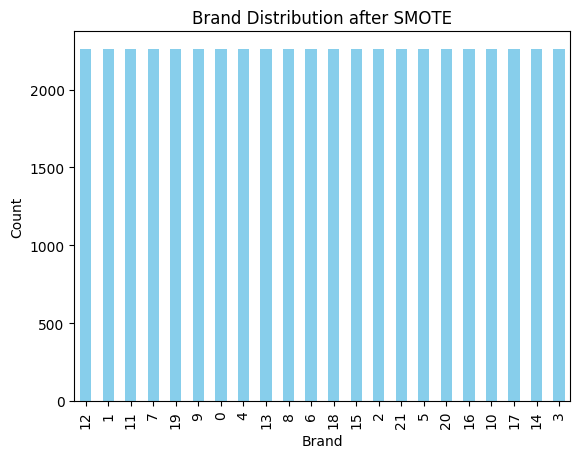

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_final, y_encoded)

# Create a DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Brand'] = y_resampled

# Count the occurrences of each brand in the resampled data
brand_counts_resampled = df_resampled['Brand'].value_counts()

# Plotting the bar chart
brand_counts_resampled.plot(kind='bar', color='skyblue')
plt.title('Brand Distribution after SMOTE')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


ANOVA BORUTA SMOTE

In [ ]:
import pandas as pd

# Replace 'path_to_dataset' with the actual path to your dataset file
df = pd.read_csv('/content/Dataset33new (1).csv')
df.head()

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,MG,2022,MG3,USED,Automatic,Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
1,BMW,2022,430I,USED,Automatic,Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
2,Mercedes-Benz,2011,E500,USED,Automatic,Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
3,Renault,2022,Arkana,USED,Automatic,Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
4,Land,2017,Rover,USED,Automatic,AWD,Diesel,5.1 L / 100 km,67662,White / Black,"Blacktown, NSW",4 cyl,SUV,2 Doors,4 Seats,62280


In [ ]:
X = df[['Model', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType',
       'FuelConsumption', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats',
       'Price', 'Year']]
y = df['Brand']

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int', 'float']).columns

# Create DataFrames for categorical and numerical columns
X_categorical = X[categorical_columns]
X_numerical = X[numerical_columns]

from sklearn.preprocessing import LabelEncoder



# Perform label encoding only on columns with dtype object
label_encoder = LabelEncoder()
X_encoded = X_categorical.copy()
for col in categorical_columns:
    X_encoded[col] = X[col].astype(str)  # Ensure the column is of string dtype before label encoding
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


# Initialize LabelEncoder for the target variable y
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)
# Merge with original X containing int and float columns
X_final = pd.concat([X_encoded, X.select_dtypes(include=['int', 'float'])], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

In [ ]:
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 840.0 kB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
np.int = np.int32
np.float = np.float64
np.bool = np.bool_
# Assuming X_train and y_train are your training features and target labels respectively


# Assuming X_train and y_train are your training features and target labels respectively

# Convert X_train to DataFrame if it's not already
X_train = pd.DataFrame(X_train)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)

# Initialize Boruta
boruta_feature_selector = BorutaPy(xgb_model, n_estimators='auto', verbose=2)

# Fit Boruta on the data
boruta_feature_selector.fit(X_train.values, y_train)

# Check selected features
selected_features = X_train.columns[boruta_feature_selector.support_]
print(selected_features)



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	2
I

In [ ]:
X.shape

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define the number of features to select (k)
k = 8

# Initialize SelectKBest with the f_classif scoring function (assuming classification task)
selector = SelectKBest(score_func=f_classif, k=k)

# Fit selector to the training data (X_encoded and y_encoded)
X_selected = selector.fit_transform(X_final, y_encoded)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_final.columns[selected_feature_indices]

# Print selected feature names
print("Selected Features:")
print(selected_feature_names)



Selected Features:
Index(['Model', 'UsedOrNew', 'DriveType', 'FuelType', 'CylindersinEngine',
       'BodyType', 'Price', 'Year'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
total_features = X_train.shape[1]
rfe = RFE(model, n_features_to_select=total_features)

# Fit the RFE to the training data
rfe.fit(X_train, y_train)
ranking = rfe.ranking_
num_irrelevant_features_eliminated = np.arange(total_features - 1, -1, -1)

accuracy_list = []
for i in num_irrelevant_features_eliminated:
 rfe = RFE(model, n_features_to_select=(total_features - i))
 rfe.fit(X_train, y_train)
 y_pred = rfe.predict(X_test)
 accuracy = accuracy_score(y_test, y_pred)
 accuracy_list.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(num_irrelevant_features_eliminated, accuracy_list, marker='o')
plt.xlabel("Number of Irrelevant Features Eliminated")
plt.ylabel("Accuracy")
plt.title("Model Performance as Irrelevant Features are Eliminated (RFE)")
plt.grid(True)
plt.show()

RF

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Define the range of k values to test
k_values = np.arange(1,15)

# Initialize lists to store results
accuracy_scores = []

# Iterate over different values of k
for k in k_values:
    # Apply univariate feature selection
    best_features = SelectKBest(score_func=f_classif, k=k).fit(X_final, y_encoded)
    selected_features = X_final.columns[best_features.get_support()]

    # Transform the feature matrix
    X_selected = X_final[selected_features]

    # Initialize Gaussian Naive Bayes classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Calculate cross-validated accuracy
    scores = cross_val_score(model, X_selected, y_encoded, cv=5)
    accuracy = np.mean(scores)

    # Append the accuracy score
    accuracy_scores.append(accuracy)

# Find the index of the maximum accuracy score
best_k_index = np.argmax(accuracy_scores)

# Get the best k value and corresponding accuracy score
best_k = k_values[best_k_index]
best_accuracy = accuracy_scores[best_k_index]

print(f"Best k value: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")


Best k value: 1
Corresponding accuracy: 0.9905969236296155


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_result_rf = classification_report(y_test, y_pred_rf, digits=3)

print(f"Accuracy (Random Forest with SMOTE): {accuracy_rf}")
print("Classification Report (Random Forest with SMOTE):\n", classification_report_result_rf)

Accuracy (Random Forest with SMOTE): 0.9766763848396501
Classification Report (Random Forest with SMOTE):
               precision    recall  f1-score   support

           0      0.934     0.947     0.940        75
           1      0.935     0.967     0.951        60
           2      0.967     0.962     0.964       182
           3      1.000     0.973     0.986        37
           4      0.976     0.976     0.976       212
           5      0.962     0.974     0.968        77
           6      0.980     0.968     0.974       248
           7      1.000     1.000     1.000        41
           8      0.966     0.983     0.974        58
           9      0.982     0.964     0.973       167
          10      0.977     0.977     0.977        43
          11      0.913     0.750     0.824        28
          12      1.000     1.000     1.000        66
          13      0.991     0.982     0.986       223
          14      0.973     0.973     0.973       112
          15      0.980     

Gaussian NB

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_result_nb = classification_report(y_test, y_pred_nb, digits=3)

print(f"Accuracy (Gaussian NB with SMOTE): {accuracy_nb}")
print("Classification Report (Gaussian NB with SMOTE):\n", classification_report_result_nb)


Accuracy (Gaussian NB with SMOTE): 0.21355685131195334
Classification Report (Gaussian NB with SMOTE):
               precision    recall  f1-score   support

           0      1.000     0.013     0.026        75
           1      0.800     0.067     0.123        60
           2      0.812     0.214     0.339       182
           3      0.315     0.784     0.450        37
           4      0.339     0.368     0.353       212
           5      0.072     0.662     0.130        77
           6      0.278     0.020     0.038       248
           7      0.133     1.000     0.234        41
           8      0.446     0.638     0.525        58
           9      0.115     0.054     0.073       167
          10      1.000     0.860     0.925        43
          11      0.122     0.214     0.156        28
          12      0.210     0.682     0.321        66
          13      0.818     0.040     0.077       223
          14      0.189     0.268     0.221       112
          15      0.255     0.1

DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Define the total number of features
total_features = X_train.shape[1]

# Initialize RFE with the Decision Tree classifier
rfe = RFE(model, n_features_to_select=total_features)

# Fit the RFE to the training data
rfe.fit(X_train, y_train)
ranking = rfe.ranking_
num_irrelevant_features_eliminated = np.arange(total_features - 1, -1, -1)

# Evaluate performance for different number of eliminated features
accuracy_list = []
for i in num_irrelevant_features_eliminated:
    rfe = RFE(model, n_features_to_select=(total_features - i))
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(num_irrelevant_features_eliminated, accuracy_list, marker='o')
plt.xlabel("Number of Irrelevant Features Eliminated")
plt.ylabel("Accuracy")
plt.title("Model Performance as Irrelevant Features are Eliminated (RFE)")
plt.grid(True)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_result_dt = classification_report(y_test, y_pred_dt, digits=3)

print(f"Accuracy (Decision Tree with SMOTE): {accuracy_dt}")
print("Classification Report (Decision Tree with SMOTE):\n", classification_report_result_dt)


Accuracy (Decision Tree with SMOTE): 0.9752186588921283
Classification Report (Decision Tree with SMOTE):
               precision    recall  f1-score   support

           0      0.947     0.960     0.954        75
           1      0.983     0.967     0.975        60
           2      0.989     0.951     0.969       182
           3      0.947     0.973     0.960        37
           4      0.981     0.981     0.981       212
           5      0.895     1.000     0.945        77
           6      0.976     0.980     0.978       248
           7      1.000     1.000     1.000        41
           8      1.000     0.983     0.991        58
           9      0.981     0.952     0.967       167
          10      0.977     1.000     0.989        43
          11      0.793     0.821     0.807        28
          12      0.971     1.000     0.985        66
          13      1.000     0.987     0.993       223
          14      0.955     0.938     0.946       112
          15      0.969     

kNN

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# Define the range of k values to test
k_values = np.arange(1,15)

# Initialize lists to store results
accuracy_scores = []

# Iterate over different values of k
for k in k_values:
    # Apply univariate feature selection
    best_features = SelectKBest(score_func=f_classif, k=k).fit(X_final, y_encoded)
    selected_features = X_final.columns[best_features.get_support()]

    # Transform the feature matrix
    X_selected = X_final[selected_features]

    # Initialize Gaussian Naive Bayes classifier
    model = KNeighborsClassifier()

    # Calculate cross-validated accuracy
    scores = cross_val_score(model, X_selected, y_encoded, cv=5)
    accuracy = np.mean(scores)

    # Append the accuracy score
    accuracy_scores.append(accuracy)

# Find the index of the maximum accuracy score
best_k_index = np.argmax(accuracy_scores)

# Get the best k value and corresponding accuracy score
best_k = k_values[best_k_index]
best_accuracy = accuracy_scores[best_k_index]

print(f"Best k value: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")


Best k value: 2
Corresponding accuracy: 0.9820687219734516


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaler to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_result_knn = classification_report(y_test, y_pred_knn, digits=3)

print(f"Accuracy (kNN with SMOTE and Standard Scaler): {accuracy_knn}")
print("Classification Report (kNN with SMOTE and Standard Scaler):\n", classification_report_result_knn)


Accuracy (kNN with SMOTE and Standard Scaler): 0.8549562682215743
Classification Report (kNN with SMOTE and Standard Scaler):
               precision    recall  f1-score   support

           0      0.729     0.827     0.775        75
           1      0.806     0.833     0.820        60
           2      0.847     0.885     0.866       182
           3      0.846     0.892     0.868        37
           4      0.813     0.863     0.838       212
           5      0.606     0.818     0.696        77
           6      0.890     0.851     0.870       248
           7      0.673     0.902     0.771        41
           8      0.788     0.897     0.839        58
           9      0.892     0.838     0.864       167
          10      0.860     0.860     0.860        43
          11      0.636     0.750     0.689        28
          12      0.942     0.985     0.963        66
          13      0.936     0.857     0.895       223
          14      0.857     0.804     0.829       112
        

SVM

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the SVM Classifier
svm_classifier = SVC()

# Train the classifier on the resampled training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the labels of the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy with SMOTE:", accuracy_svm)

# Generate and print the classification report
report_svm = classification_report(y_test, y_pred_svm, digits=3)
print("Support Vector Machine Classification Report with SMOTE:\n", report_svm)


Support Vector Machine Accuracy with SMOTE: 0.7230320699708455
Support Vector Machine Classification Report with SMOTE:
               precision    recall  f1-score   support

           0      0.631     0.707     0.667        75
           1      0.753     0.917     0.827        60
           2      0.719     0.758     0.738       182
           3      0.723     0.919     0.810        37
           4      0.732     0.797     0.763       212
           5      0.303     0.818     0.442        77
           6      0.740     0.585     0.653       248
           7      0.615     0.976     0.755        41
           8      0.803     0.845     0.824        58
           9      0.723     0.563     0.633       167
          10      0.812     0.907     0.857        43
          11      0.457     0.750     0.568        28
          12      0.892     0.879     0.885        66
          13      0.859     0.682     0.760       223
          14      0.871     0.661     0.751       112
          15  

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
def compile_text(x):
    text = f"""Model: {x['Model']}, Used or New: {x['UsedOrNew']}, Transmission: {x['Transmission']}, Drive Type: {x['DriveType']}, Fuel Type: {x['FuelType']}, Fuel Consumption: {x['FuelConsumption']}, Cylinders in Engine: {x['CylindersinEngine']}, Body Type: {x['BodyType']}, Doors: {x['Doors']}, Seats: {x['Seats']}, Price: {x['Price']}, Year: {x['Year']}
          """
    return text



sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()

In [ ]:
for i in range(1):
    print(sentences[i])

Model: MG3, Used or New: USED, Transmission: Automatic, Drive Type: Front, Fuel Type: Premium, Fuel Consumption: 6.7 L / 100 km, Cylinders in Engine: 4 cyl, Body Type: Hatchback, Doors:  5 Doors, Seats:  5 Seats, Price: 19990, Year: 2022
          


In [ ]:
import pandas as pd
import numpy as np # linear algebra
from sentence_transformers import SentenceTransformer
def compile_text(x):
    text = f"""Model: {x['Model']},
              Used or New: {x['UsedOrNew']},
              Transmission: {x['Transmission']},
              Drive Type: {x['DriveType']},
              Fuel Type: {x['FuelType']},
              Fuel Consumption: {x['FuelConsumption']},
              Cylinders in Engine: {x['CylindersinEngine']},
              Body Type: {x['BodyType']},
              Doors: {x['Doors']},
              Seats: {x['Seats']},
              Price: {x['Price']},
              Year: {x['Year']}
          """
    return text



sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()
model = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")

output = model.encode(sentences=sentences, show_progress_bar= True, normalize_embeddings  = True)

df_embedding = pd.DataFrame(output)
df_embedding


df_embedding.to_csv("embedding_train3.csv",index = False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/429 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np # linear algebra

# Replace 'path_to_dataset' with the actual path to your dataset file
df = pd.read_csv('/content/embedding_train3.csv')
df_embedding = df

RF

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


# Initialize LabelEncoder for the target variable y
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_embedding, y_encoded, test_size=0.2, random_state=42)

# Initialize the classifier (you can use any classifier of your choice)
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the classifier on the balanced dataset
classifier.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred, digits=3)
print("Classification Report:")
print(report)

# Optionally, you can also print the accuracy
print("Accuracy:", accuracy)

# Optionally, you can save the trained model for future use
# import joblib
# joblib.dump(classifier, 'classifier_model.pkl')


Accuracy: 0.9959912536443148
Classification Report:
              precision    recall  f1-score   support

           0      0.987     1.000     0.993        75
           1      0.952     1.000     0.976        60
           2      0.995     1.000     0.997       182
           3      1.000     1.000     1.000        37
           4      1.000     0.995     0.998       212
           5      1.000     1.000     1.000        77
           6      0.996     1.000     0.998       248
           7      1.000     1.000     1.000        41
           8      1.000     1.000     1.000        58
           9      0.994     0.988     0.991       167
          10      1.000     1.000     1.000        43
          11      1.000     0.893     0.943        28
          12      1.000     1.000     1.000        66
          13      1.000     0.996     0.998       223
          14      0.974     0.991     0.982       112
          15      1.000     0.995     0.997       194
          16      1.000     1

Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
classifier_nb = GaussianNB()

# Train the classifier
classifier_nb.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred_nb = classifier_nb.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Gaussian NB Accuracy:", accuracy_nb)

# Classification Report
report_nb = classification_report(y_test, y_pred_nb, digits=3)
print("Gaussian NB Classification Report:")
print(report_nb)


Gaussian NB Accuracy: 0.8815597667638484
Gaussian NB Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.827     0.905        75
           1      0.867     0.867     0.867        60
           2      0.908     0.813     0.858       182
           3      1.000     0.946     0.972        37
           4      0.771     0.892     0.827       212
           5      0.874     0.987     0.927        77
           6      0.899     0.722     0.801       248
           7      1.000     1.000     1.000        41
           8      0.873     0.828     0.850        58
           9      0.835     0.820     0.828       167
          10      1.000     1.000     1.000        43
          11      0.559     0.679     0.613        28
          12      1.000     1.000     1.000        66
          13      1.000     0.964     0.982       223
          14      0.718     0.839     0.774       112
          15      0.978     0.902     0.938       194
     

DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
classifier_dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier_dt.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred_dt = classifier_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Classification Report
report_dt = classification_report(y_test, y_pred_dt, digits=3)
print("Decision Tree Classification Report:")
print(report_dt)


Decision Tree Accuracy: 0.9489795918367347
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0      0.864     0.933     0.897        75
           1      0.773     0.850     0.810        60
           2      0.936     0.962     0.949       182
           3      0.878     0.973     0.923        37
           4      0.957     0.953     0.955       212
           5      0.960     0.935     0.947        77
           6      0.956     0.972     0.964       248
           7      1.000     0.951     0.975        41
           8      0.933     0.966     0.949        58
           9      0.935     0.952     0.944       167
          10      1.000     1.000     1.000        43
          11      0.793     0.821     0.807        28
          12      0.939     0.939     0.939        66
          13      0.964     0.951     0.957       223
          14      0.857     0.804     0.829       112
          15      0.995     0.969     0.982       194
 

kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize the kNN classifier
classifier_knn = KNeighborsClassifier()

# Train the classifier
classifier_knn.fit(X_train_scaled, y_train_smote)

# Predict on the testing set
y_pred_knn = classifier_knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("kNN Accuracy:", accuracy_knn)

# Classification Report
report_knn = classification_report(y_test, y_pred_knn, digits=3)
print("kNN Classification Report:")
print(report_knn)


kNN Accuracy: 0.9959912536443148
kNN Classification Report:
              precision    recall  f1-score   support

           0      0.974     1.000     0.987        75
           1      0.968     1.000     0.984        60
           2      1.000     1.000     1.000       182
           3      1.000     1.000     1.000        37
           4      1.000     0.995     0.998       212
           5      1.000     1.000     1.000        77
           6      0.996     0.996     0.996       248
           7      1.000     1.000     1.000        41
           8      0.967     1.000     0.983        58
           9      1.000     0.988     0.994       167
          10      1.000     1.000     1.000        43
          11      0.964     0.964     0.964        28
          12      1.000     1.000     1.000        66
          13      0.996     0.996     0.996       223
          14      0.982     0.991     0.987       112
          15      1.000     0.995     0.997       194
          16      1.0

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
classifier_svm = SVC( random_state=42)

# Train the classifier
classifier_svm.fit(X_train_scaled, y_train_smote)

# Predict on the testing set
y_pred_svm = classifier_svm.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification Report
report_svm = classification_report(y_test, y_pred_svm, digits=3)
print("SVM Classification Report:")
print(report_svm)


SVM Accuracy: 0.9963556851311953
SVM Classification Report:
              precision    recall  f1-score   support

           0      0.974     1.000     0.987        75
           1      0.984     1.000     0.992        60
           2      1.000     1.000     1.000       182
           3      1.000     1.000     1.000        37
           4      0.995     0.995     0.995       212
           5      1.000     1.000     1.000        77
           6      0.996     1.000     0.998       248
           7      1.000     1.000     1.000        41
           8      1.000     1.000     1.000        58
           9      1.000     0.988     0.994       167
          10      1.000     1.000     1.000        43
          11      1.000     0.929     0.963        28
          12      1.000     1.000     1.000        66
          13      0.991     0.996     0.993       223
          14      0.974     0.991     0.982       112
          15      1.000     0.995     0.997       194
          16      1.0

L12

In [ ]:
import pandas as pd
import numpy as np # linear algebra
from sentence_transformers import SentenceTransformer
def compile_text(x):
    text = f"""Model: {x['Model']},
              Used or New: {x['UsedOrNew']},
              Drive Type: {x['DriveType']},
              Fuel Type: {x['FuelType']},
              Cylinders in Engine: {x['CylindersinEngine']},
              Body Type: {x['BodyType']},
              Price: {x['Price']},
              Year: {x['Year']}
          """
    return text




sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()
model = SentenceTransformer(r"paraphrase-multilingual-MiniLM-L12-v2")

output = model.encode(sentences=sentences, show_progress_bar= True, normalize_embeddings  = True)

df_embedding = pd.DataFrame(output)
df_embedding


df_embedding.to_csv("embedding_train3L12.csv",index = False)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/429 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np # linear algebra

# Replace 'path_to_dataset' with the actual path to your dataset file
df = pd.read_csv('/content/embedding_train3L12.csv')
df_embedding = df

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


# Initialize LabelEncoder for the target variable y
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

RF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_embedding, y_encoded, test_size=0.2, random_state=42)

# Initialize the classifier (you can use any classifier of your choice)
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the classifier on the balanced dataset
classifier.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred, digits=3)
print("Classification Report:")
print(report)

# Optionally, you can also print the accuracy
print("Accuracy:", accuracy)

# Optionally, you can save the trained model for future use
# import joblib
# joblib.dump(classifier, 'classifier_model.pkl')


Accuracy: 0.9974489795918368
Classification Report:
              precision    recall  f1-score   support

           0      0.974     1.000     0.987        75
           1      0.984     1.000     0.992        60
           2      1.000     1.000     1.000       182
           3      1.000     1.000     1.000        37
           4      0.991     0.995     0.993       212
           5      1.000     1.000     1.000        77
           6      0.996     1.000     0.998       248
           7      1.000     1.000     1.000        41
           8      1.000     1.000     1.000        58
           9      1.000     0.988     0.994       167
          10      1.000     1.000     1.000        43
          11      1.000     0.964     0.982        28
          12      1.000     1.000     1.000        66
          13      1.000     1.000     1.000       223
          14      0.991     1.000     0.996       112
          15      1.000     0.995     0.997       194
          16      1.000     1

Gau

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
classifier_nb = GaussianNB()

# Train the classifier
classifier_nb.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred_nb = classifier_nb.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Gaussian NB Accuracy:", accuracy_nb)

# Classification Report
report_nb = classification_report(y_test, y_pred_nb, digits=3)
print("Gaussian NB Classification Report:")
print(report_nb)


Gaussian NB Accuracy: 0.8633381924198251
Gaussian NB Classification Report:
              precision    recall  f1-score   support

           0      0.865     0.853     0.859        75
           1      0.732     0.867     0.794        60
           2      0.855     0.808     0.831       182
           3      0.900     0.973     0.935        37
           4      0.801     0.892     0.844       212
           5      0.826     0.987     0.899        77
           6      0.905     0.690     0.783       248
           7      1.000     1.000     1.000        41
           8      0.879     0.879     0.879        58
           9      0.725     0.946     0.821       167
          10      1.000     1.000     1.000        43
          11      0.808     0.750     0.778        28
          12      1.000     1.000     1.000        66
          13      1.000     0.924     0.960       223
          14      0.817     0.875     0.845       112
          15      0.957     0.923     0.940       194
     

DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
classifier_dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier_dt.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred_dt = classifier_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Classification Report
report_dt = classification_report(y_test, y_pred_dt, digits=3)
print("Decision Tree Classification Report:")
print(report_dt)


Decision Tree Accuracy: 0.9460641399416909
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0      0.880     0.880     0.880        75
           1      0.864     0.850     0.857        60
           2      0.962     0.967     0.964       182
           3      0.895     0.919     0.907        37
           4      0.927     0.958     0.942       212
           5      0.926     0.974     0.949        77
           6      0.963     0.935     0.949       248
           7      1.000     0.976     0.988        41
           8      0.902     0.948     0.924        58
           9      0.928     0.928     0.928       167
          10      1.000     1.000     1.000        43
          11      0.952     0.714     0.816        28
          12      0.970     0.970     0.970        66
          13      0.959     0.942     0.950       223
          14      0.860     0.821     0.840       112
          15      0.970     0.990     0.980       194
 

kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize the kNN classifier
classifier_knn = KNeighborsClassifier()

# Train the classifier
classifier_knn.fit(X_train_scaled, y_train_smote)

# Predict on the testing set
y_pred_knn = classifier_knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("kNN Accuracy:", accuracy_knn)

# Classification Report
report_knn = classification_report(y_test, y_pred_knn, digits=3)
print("kNN Classification Report:")
print(report_knn)


kNN Accuracy: 0.9967201166180758
kNN Classification Report:
              precision    recall  f1-score   support

           0      0.974     1.000     0.987        75
           1      1.000     1.000     1.000        60
           2      1.000     1.000     1.000       182
           3      1.000     1.000     1.000        37
           4      1.000     0.995     0.998       212
           5      0.987     1.000     0.994        77
           6      0.996     0.996     0.996       248
           7      1.000     1.000     1.000        41
           8      1.000     1.000     1.000        58
           9      1.000     0.988     0.994       167
          10      1.000     1.000     1.000        43
          11      1.000     1.000     1.000        28
          12      0.985     1.000     0.992        66
          13      0.996     0.996     0.996       223
          14      0.991     1.000     0.996       112
          15      1.000     0.995     0.997       194
          16      1.0

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
classifier_svm = SVC( random_state=42)

# Train the classifier
classifier_svm.fit(X_train_scaled, y_train_smote)

# Predict on the testing set
y_pred_svm = classifier_svm.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification Report
report_svm = classification_report(y_test, y_pred_svm, digits=3)
print("SVM Classification Report:")
print(report_svm)


SVM Accuracy: 0.9970845481049563
SVM Classification Report:
              precision    recall  f1-score   support

           0      0.974     1.000     0.987        75
           1      1.000     1.000     1.000        60
           2      1.000     1.000     1.000       182
           3      1.000     1.000     1.000        37
           4      1.000     0.995     0.998       212
           5      1.000     1.000     1.000        77
           6      0.996     1.000     0.998       248
           7      1.000     1.000     1.000        41
           8      1.000     1.000     1.000        58
           9      0.994     0.988     0.991       167
          10      1.000     1.000     1.000        43
          11      1.000     0.964     0.982        28
          12      0.985     1.000     0.992        66
          13      1.000     0.996     0.998       223
          14      0.991     1.000     0.996       112
          15      1.000     0.995     0.997       194
          16      1.0